In [119]:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os




In [120]:

dataPath = './dds/'
df = pd.DataFrame()
for file in os.listdir(dataPath):
    data_raw = pd.read_excel(dataPath + file,  skiprows=4)
    df = pd.concat([df, data_raw])

df


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,56,NaN,A5,30 BAY 10,NaN,...,1.0,0.0,1.0,1546.0,1428.0,1930.0,1,A5,75000,2022-06-01
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,NaN,A5,36 BAY 10TH STREET,NaN,...,1.0,0.0,1.0,1547.0,1428.0,1930.0,1,A5,0,2022-03-18
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,NaN,A9,8645 16TH AVENUE,NaN,...,1.0,0.0,1.0,2058.0,1492.0,1930.0,1,A9,875000,2022-01-07
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,48,NaN,A9,12 BAY 13TH ST,NaN,...,1.0,0.0,1.0,3142.0,3200.0,1999.0,1,A9,0,2022-03-14
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,74,NaN,A5,72 BAY 14TH STREET,NaN,...,1.0,0.0,1.0,2492.0,972.0,1950.0,1,A5,890000,2021-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,78,NaN,B9,82 AMBASSADOR LANE,NaN,...,2.0,0.0,2.0,2360.0,2565.0,2001.0,1,B9,618000,2022-01-07
8859,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7267,200,NaN,V0,N/A CLAY PIT ROAD,NaN,...,0.0,0.0,0.0,68770.0,0.0,NaN,1,V0,1000,2021-10-22
8860,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,37,NaN,V0,N/A ENGLEWOOD AVENUE,NaN,...,0.0,0.0,0.0,43800.0,0.0,NaN,1,V0,40000,2022-06-28
8861,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,39,NaN,V0,N/A ENGLEWOOD AVENUE,NaN,...,0.0,0.0,0.0,8000.0,0.0,NaN,1,V0,2000,2021-12-29


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97650 entries, 0 to 8862
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         97650 non-null  int64         
 1   NEIGHBORHOOD                    97650 non-null  object        
 2   BUILDING CLASS CATEGORY         97650 non-null  object        
 3   TAX CLASS AT PRESENT            97487 non-null  object        
 4   BLOCK                           97650 non-null  int64         
 5   LOT                             97650 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       97487 non-null  object        
 8   ADDRESS                         97650 non-null  object        
 9   APARTMENT NUMBER                24773 non-null  object        
 10  ZIP CODE                        97646 non-null  float64       
 11  RES

<AxesSubplot:>

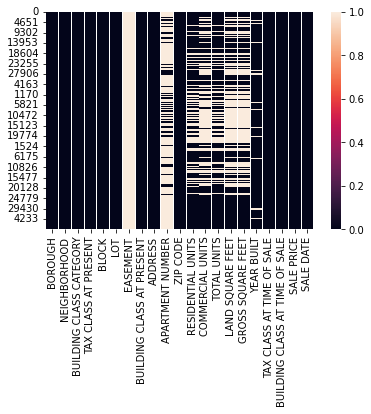

In [122]:
sns.heatmap(df.isnull())

In [123]:
df.drop(['EASEMENT', 'APARTMENT NUMBER'],axis=1, inplace=True)

In [124]:
district_by_borough = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island",
}

df['BOROUGH'] = [district_by_borough.get(borough) for borough in df['BOROUGH']]
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,56,A5,30 BAY 10,11228.0,1.0,0.0,1.0,1546.0,1428.0,1930.0,1,A5,75000,2022-06-01
1,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,A5,36 BAY 10TH STREET,11228.0,1.0,0.0,1.0,1547.0,1428.0,1930.0,1,A5,0,2022-03-18
2,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,A9,8645 16TH AVENUE,11214.0,1.0,0.0,1.0,2058.0,1492.0,1930.0,1,A9,875000,2022-01-07
3,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,48,A9,12 BAY 13TH ST,11214.0,1.0,0.0,1.0,3142.0,3200.0,1999.0,1,A9,0,2022-03-14
4,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,74,A5,72 BAY 14TH STREET,11214.0,1.0,0.0,1.0,2492.0,972.0,1950.0,1,A5,890000,2021-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,78,B9,82 AMBASSADOR LANE,10309.0,2.0,0.0,2.0,2360.0,2565.0,2001.0,1,B9,618000,2022-01-07
8859,Staten Island,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7267,200,V0,N/A CLAY PIT ROAD,10309.0,0.0,0.0,0.0,68770.0,0.0,NaN,1,V0,1000,2021-10-22
8860,Staten Island,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,37,V0,N/A ENGLEWOOD AVENUE,10309.0,0.0,0.0,0.0,43800.0,0.0,NaN,1,V0,40000,2022-06-28
8861,Staten Island,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,39,V0,N/A ENGLEWOOD AVENUE,10309.0,0.0,0.0,0.0,8000.0,0.0,NaN,1,V0,2000,2021-12-29


In [125]:
df = df[(df['TOTAL UNITS'] > 0) & (df['LAND SQUARE FEET'] > 0) & (df['SALE PRICE'] > 0)]
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,56,A5,30 BAY 10,11228.0,1.0,0.0,1.0,1546.0,1428.0,1930.0,1,A5,75000,2022-06-01
2,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,A9,8645 16TH AVENUE,11214.0,1.0,0.0,1.0,2058.0,1492.0,1930.0,1,A9,875000,2022-01-07
4,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,74,A5,72 BAY 14TH STREET,11214.0,1.0,0.0,1.0,2492.0,972.0,1950.0,1,A5,890000,2021-10-08
5,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,24,A9,8645 BAY 16 STREE,11214.0,1.0,0.0,1.0,1571.0,1456.0,1935.0,1,A9,925000,2021-11-03
11,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6379,42,S1,2142 86TH STREET,11214.0,1.0,1.0,2.0,1600.0,2640.0,1925.0,1,S1,2430000,2022-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,B9,48 ROBIN COURT,10309.0,2.0,0.0,2.0,3146.0,2400.0,1994.0,1,B9,625000,2022-08-02
8850,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,9,B9,59 PHEASANT LANE,10309.0,2.0,0.0,2.0,2590.0,1850.0,1998.0,1,B9,1,2022-05-19
8853,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,57,B9,20 QUAIL LANE,10309.0,2.0,0.0,2.0,2359.0,2451.0,1998.0,1,B9,710000,2021-10-08
8858,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,78,B9,82 AMBASSADOR LANE,10309.0,2.0,0.0,2.0,2360.0,2565.0,2001.0,1,B9,618000,2022-01-07


<AxesSubplot:>

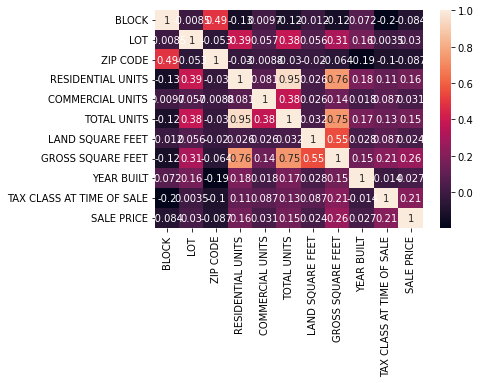

In [126]:
sns.heatmap(df.corr(),annot=True)

In [127]:
df['YEAR QUARTER'] = df['SALE DATE'].apply(lambda x: f"{x.year}-{x.quarter}")
df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR QUARTER
0,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,56,A5,30 BAY 10,11228.0,1.0,0.0,1.0,1546.0,1428.0,1930.0,1,A5,75000,2022-06-01,2022-2
2,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,A9,8645 16TH AVENUE,11214.0,1.0,0.0,1.0,2058.0,1492.0,1930.0,1,A9,875000,2022-01-07,2022-1
4,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,74,A5,72 BAY 14TH STREET,11214.0,1.0,0.0,1.0,2492.0,972.0,1950.0,1,A5,890000,2021-10-08,2021-4
5,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,24,A9,8645 BAY 16 STREE,11214.0,1.0,0.0,1.0,1571.0,1456.0,1935.0,1,A9,925000,2021-11-03,2021-4
11,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6379,42,S1,2142 86TH STREET,11214.0,1.0,1.0,2.0,1600.0,2640.0,1925.0,1,S1,2430000,2022-07-27,2022-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,B9,48 ROBIN COURT,10309.0,2.0,0.0,2.0,3146.0,2400.0,1994.0,1,B9,625000,2022-08-02,2022-3
8850,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,9,B9,59 PHEASANT LANE,10309.0,2.0,0.0,2.0,2590.0,1850.0,1998.0,1,B9,1,2022-05-19,2022-2
8853,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,57,B9,20 QUAIL LANE,10309.0,2.0,0.0,2.0,2359.0,2451.0,1998.0,1,B9,710000,2021-10-08,2021-4
8858,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,78,B9,82 AMBASSADOR LANE,10309.0,2.0,0.0,2.0,2360.0,2565.0,2001.0,1,B9,618000,2022-01-07,2022-1


In [128]:
grouped = df.groupby(['BOROUGH', 'YEAR QUARTER']).median().reset_index()
grouped

,BOROUGH,YEAR QUARTER,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,Bronx,2021-4,4231.0,39.0,10465.0,2.0,0.0,2.0,2500.0,2212.0,1931.0,1.0,726250.0
1,Bronx,2022-1,4259.0,42.0,10465.0,2.0,0.0,2.0,2500.0,2210.0,1930.0,1.0,730000.0
2,Bronx,2022-2,4223.5,43.0,10465.0,2.0,0.0,2.0,2500.0,2223.0,1930.0,1.0,735000.0
3,Bronx,2022-3,4271.5,39.0,10466.0,2.0,0.0,2.0,2499.0,2222.5,1930.0,1.0,730000.0
4,Brooklyn,2021-4,5308.0,37.0,11220.0,2.0,0.0,2.0,2104.5,2400.0,1925.0,1.0,1170000.0
5,Brooklyn,2022-1,5311.0,37.0,11221.0,2.0,0.0,2.0,2058.0,2380.0,1925.0,1.0,1150000.0
6,Brooklyn,2022-2,5091.0,38.0,11220.0,2.0,0.0,2.0,2003.0,2400.0,1925.0,1.0,1234529.0
7,Brooklyn,2022-3,5209.0,37.0,11221.0,2.0,0.0,2.0,2003.0,2400.0,1925.0,1.0,1270000.0
8,Manhattan,2021-4,1230.0,37.0,10024.0,5.0,1.0,7.0,2500.0,8050.0,1910.0,2.0,6700000.0
9,Manhattan,2022-1,1288.5,37.5,10024.0,4.0,0.0,6.0,2411.0,7497.0,1910.0,2.0,5675000.0


In [144]:
sns.set(rc={"figure.figsize": (10, 10)})

<AxesSubplot:xlabel='YEAR QUARTER', ylabel='SALE PRICE'>

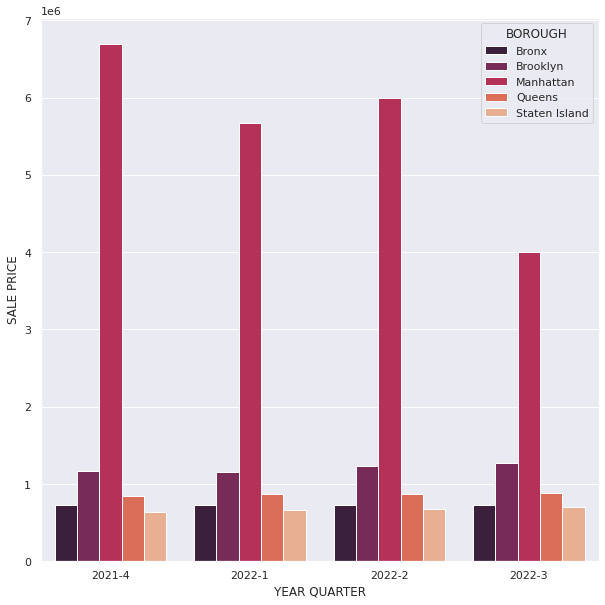

In [145]:
sns.barplot(x="YEAR QUARTER", y="SALE PRICE", hue="BOROUGH", orient ='vertical', palette="rocket", data=grouped)

<AxesSubplot:xlabel='YEAR QUARTER', ylabel='SALE PRICE'>

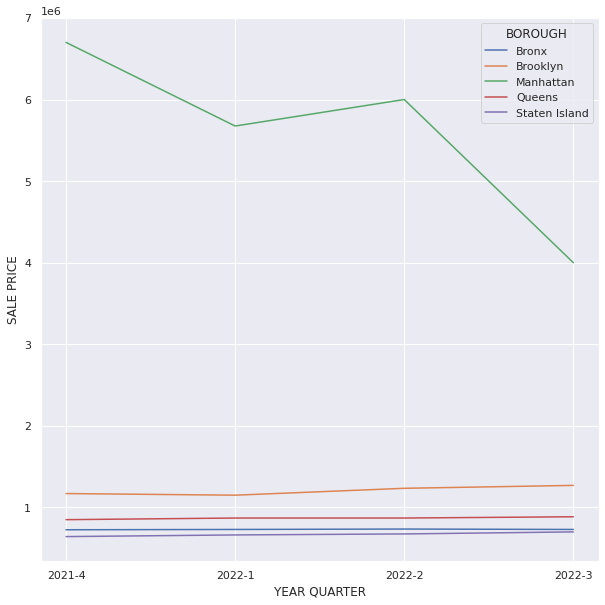

In [146]:
sns.lineplot(
    data=grouped,
    x="YEAR QUARTER",
    y='SALE PRICE',
    hue='BOROUGH',
)


In [149]:
grouped['SALE PRICE PER GROSS SQUARE FEET'] = grouped['SALE PRICE'] / grouped['GROSS SQUARE FEET']
grouped


,BOROUGH,YEAR QUARTER,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE PRICE PER GROSS SQUARE FEET
0,Bronx,2021-4,4231.0,39.0,10465.0,2.0,0.0,2.0,2500.0,2212.0,1931.0,1.0,726250.0,328.322785
1,Bronx,2022-1,4259.0,42.0,10465.0,2.0,0.0,2.0,2500.0,2210.0,1930.0,1.0,730000.0,330.316742
2,Bronx,2022-2,4223.5,43.0,10465.0,2.0,0.0,2.0,2500.0,2223.0,1930.0,1.0,735000.0,330.634278
3,Bronx,2022-3,4271.5,39.0,10466.0,2.0,0.0,2.0,2499.0,2222.5,1930.0,1.0,730000.0,328.458943
4,Brooklyn,2021-4,5308.0,37.0,11220.0,2.0,0.0,2.0,2104.5,2400.0,1925.0,1.0,1170000.0,487.500000
5,Brooklyn,2022-1,5311.0,37.0,11221.0,2.0,0.0,2.0,2058.0,2380.0,1925.0,1.0,1150000.0,483.193277
6,Brooklyn,2022-2,5091.0,38.0,11220.0,2.0,0.0,2.0,2003.0,2400.0,1925.0,1.0,1234529.0,514.387083
7,Brooklyn,2022-3,5209.0,37.0,11221.0,2.0,0.0,2.0,2003.0,2400.0,1925.0,1.0,1270000.0,529.166667
8,Manhattan,2021-4,1230.0,37.0,10024.0,5.0,1.0,7.0,2500.0,8050.0,1910.0,2.0,6700000.0,832.298137
9,Manhattan,2022-1,1288.5,37.5,10024.0,4.0,0.0,6.0,2411.0,7497.0,1910.0,2.0,5675000.0,756.969454


<AxesSubplot:xlabel='YEAR QUARTER', ylabel='SALE PRICE PER GROSS SQUARE FEET'>

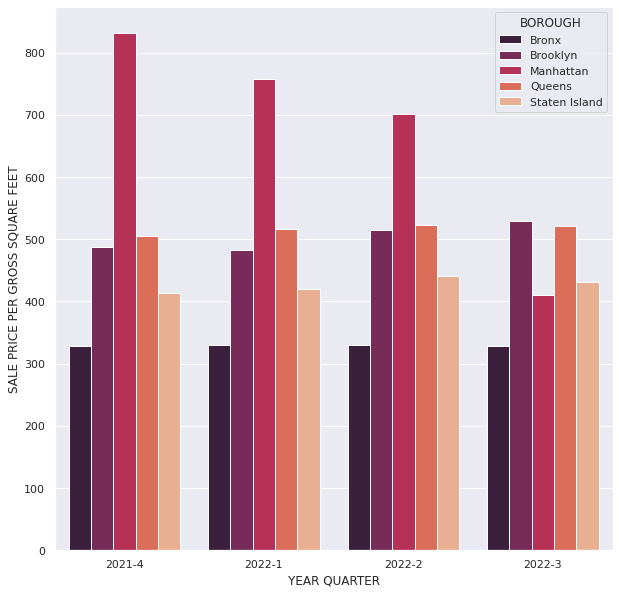

In [151]:
sns.barplot(x="YEAR QUARTER", y="SALE PRICE PER GROSS SQUARE FEET", hue="BOROUGH", orient ='vertical', palette="rocket", data=grouped)

<AxesSubplot:xlabel='YEAR QUARTER', ylabel='SALE PRICE PER GROSS SQUARE FEET'>

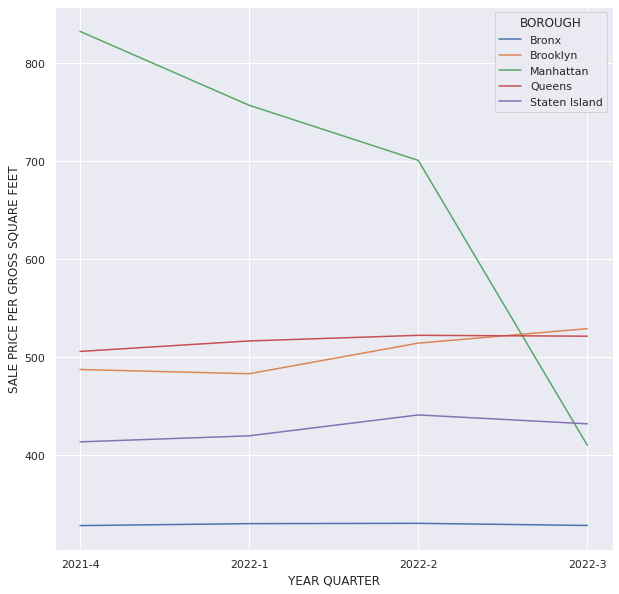

In [152]:
sns.lineplot(
    data=grouped,
    x="YEAR QUARTER",
    y='SALE PRICE PER GROSS SQUARE FEET',
    hue='BOROUGH',
)